<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/classification_decision_tree_mushroom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/jadi/mushrooms.csv')
df.head(10)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
x=df.drop(['class'],axis=1)

In [ ]:
x[0:5]

In [ ]:
y=df['class']
y[0:5]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=500)

In [ ]:
! pip install category_encoders



In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

In [ ]:
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
mushroom=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
mushroom.fit(x_train,y_train)



In [ ]:
y_prd=mushroom.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("test score",accuracy_score(y_prd,y_test))


[Text(0.4583333333333333, 0.875, 'x[4] <= 1.5\ngini = 0.499\nsamples = 6499\nvalue = [3369, 3130]'),
 Text(0.25, 0.625, 'x[14] <= 8.5\ngini = 0.067\nsamples = 2837\nvalue = [2738, 99]'),
 Text(0.16666666666666666, 0.375, 'x[19] <= 3.5\ngini = 0.055\nsamples = 2817\nvalue = [2738, 79]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.015\nsamples = 2610\nvalue = [2590, 20]'),
 Text(0.25, 0.125, 'gini = 0.408\nsamples = 207\nvalue = [148, 59]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.6666666666666666, 0.625, 'x[10] <= 3.5\ngini = 0.285\nsamples = 3662\nvalue = [631, 3031]'),
 Text(0.5, 0.375, 'x[19] <= 6.0\ngini = 0.048\nsamples = 3080\nvalue = [76, 3004]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.025\nsamples = 3042\nvalue = [38, 3004]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.8333333333333334, 0.375, 'x[19] <= 1.5\ngini = 0.088\nsamples = 582\nvalue = [555, 27]'),
 Text(0.75, 0.125, 'gini = 

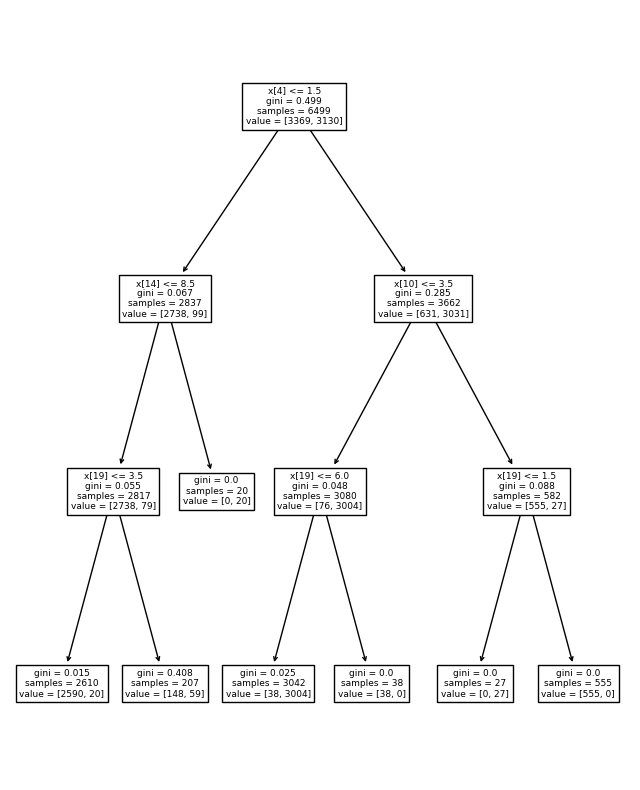

In [ ]:
plt.figure(figsize=(8,10))
from sklearn import tree
tree.plot_tree(mushroom.fit(x_train,y_train))
